In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train['Source'] = 'train'

In [6]:
test['Source'] = 'test'

In [7]:
SalePrice = train[['Id','SalePrice']]

In [8]:
train = train.drop('SalePrice',axis = 1)
#train.drop('Id',axis = 1, inplace = True)
test_Id = test['Id']
#test.drop('Id',axis = 1, inplace = True)

In [9]:
all_data = pd.concat((train,test)).reset_index(drop = True)

In [10]:
all_data.shape

(2919, 81)

In [11]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,train


# Missing Data Cleaning 
### Filled missing value with potential value like 'NA' or mean value

In [12]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [13]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio

LotFrontage      19.975339
GarageYrBlt       5.760870
GarageFinish      5.760870
GarageCond        5.760870
GarageQual        5.760870
GarageType        5.684287
BsmtCond          2.890377
BsmtExposure      2.890377
BsmtQual          2.854123
BsmtFinType2      2.817894
BsmtFinType1      2.781690
MasVnrType        0.829016
MasVnrArea        0.794199
MSZoning          0.137221
Functional        0.068564
BsmtFullBath      0.068564
BsmtHalfBath      0.068564
Utilities         0.068564
Exterior2nd       0.034270
BsmtFinSF2        0.034270
Exterior1st       0.034270
BsmtFinSF1        0.034270
Electrical        0.034270
BsmtUnfSF         0.034270
TotalBsmtSF       0.034270
GarageCars        0.034270
SaleType          0.034270
KitchenQual       0.034270
GarageArea        0.034270
BldgType          0.000000
                   ...    
OverallQual       0.000000
Condition2        0.000000
Source            0.000000
ExterCond         0.000000
TotRmsAbvGrd      0.000000
YrSold            0.000000
M

In [14]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mode()[0])

In [15]:
all_data['GarageFinish'] =all_data['GarageFinish'].fillna('NA')

In [16]:
all_data['GarageType'] = all_data['GarageType'].fillna('NA')

In [17]:
all_data['GarageCond'] = all_data['GarageCond'].fillna('NA')

In [18]:
all_data['GarageQual'] = all_data['GarageQual'].fillna('NA')

In [19]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('NA')

In [20]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('NA')

In [21]:
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('NA')

In [22]:
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('NA')

In [23]:
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('NA')

In [24]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [25]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [26]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

In [27]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [28]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [29]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [30]:
all_data['BsmtFullBath'] =all_data['BsmtFullBath'].fillna(0)

In [31]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [32]:
all_data['Utilities'] = 'AllPub'

In [33]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mode()[0])

In [34]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageCars'].mode()[0])

In [35]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

In [36]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)

In [37]:
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

In [38]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [39]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [40]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [41]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('Other')

In [42]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [43]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio

Source           0.0
ExterCond        0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
SaleCondition    0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
YearRemodAdd     0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
                ... 
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SaleType         0.0
GarageFinish     0.0
GarageType       0.0
HeatingQC        0.0
Fireplaces       0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF     

#  Feature Engineering

Convert some numerical features into categorical features. This made it easier to use labelencoder and get_dummies

In [44]:
Numerical_feat = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath",
                  "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt",
                  "YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in Numerical_feat:
    all_data[col]=all_data[col].astype(str)

Mapping values into levels. The data could be more linear. The level classification is based on the mean and medain value of each categorical value of a column

In [45]:
def map_values():
    all_data["mMSSubClass"] = all_data.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    all_data["mMSZoning"] = all_data.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    all_data["mNeighborhood"] = all_data.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    all_data["mCondition1"] = all_data.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    all_data["mBldgType"] = all_data.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    all_data["mHouseStyle"] = all_data.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    all_data["mExterior1st"] = all_data.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    all_data["mMasVnrType"] = all_data.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    all_data["mExterQual"] = all_data.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFoundation"] = all_data.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    all_data["mBsmtQual"] = all_data.BsmtQual.map({'Fa':3, 'NA':1, 'TA':4, 'Gd':5, 'Ex':6,'Po':2})
    
    all_data["mBsmtExposure"] = all_data.BsmtExposure.map({'NA':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    all_data["mHeating"] = all_data.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    all_data["mHeatingQC"] = all_data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    all_data["mKitchenQual"] = all_data.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFunctional"] = all_data.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    all_data["mGarageType"] = all_data.GarageType.map({'CarPort':1, 'NA':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    all_data["mGarageFinish"] = all_data.GarageFinish.map({'NA':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    all_data["mPavedDrive"] = all_data.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    all_data["mSaleType"] = all_data.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    all_data["mSaleCondition"] = all_data.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [46]:
map_values()

'Done!'

### Pipeline and LabelEncoding 

Using LabelEncoding to label those 'year' features
Using log1p to the skewed features
then get_dummies to all features

In [47]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler

In [48]:
class LabelEnc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YearBuilt'] = label.fit_transform(X['YearBuilt'])
        X['YearRemodAdd'] = label.fit_transform(X['YearRemodAdd'])
        X['GarageYrBlt'] = label.fit_transform(X['GarageYrBlt'])
        return X

In [49]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X
        

In [50]:
all_data2 = all_data.copy()
all_data2.drop('Source',axis = 1,inplace = True)

In [51]:
pipe = Pipeline([
    ('LabelEnc', LabelEnc()),
    ('Skew_Dummies', skew_dummies(skew = 1))
])

In [52]:
data_pipe = pipe.fit_transform(all_data2)

In [53]:
data_pipe.shape

(2919, 382)

In [54]:
n_train = train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y = SalePrice.SalePrice

In [55]:
test_X.shape

(1459, 382)

In [56]:
scaler = RobustScaler()

In [57]:
X_scaled = scaler.fit(X).transform(X)
y_log = np.log(SalePrice.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [58]:
test_X_scaled.shape

(1459, 382)

### Feature Engineering 

In [59]:
from sklearn.linear_model import Lasso,LassoCV

In [60]:
lassocv = LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [61]:
lassocv.fit(X_scaled,y_log)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], copy_X=True, cv='warn',
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [62]:
lassocv.alpha_

0.001

In [63]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index = data_pipe.columns)

In [65]:
FI_lasso.sort_values("Feature Importance",ascending = False)

,Feature Importance
GrLivArea,0.152308
OverallQual,0.104013
mNeighborhood,0.078783
BsmtFinSF1,0.054910
Functional_Typ,0.054442
BsmtQual_Ex,0.050817
Exterior1st_BrkFace,0.048736
GarageCars,0.047354
Condition1_Norm,0.046365
YearBuilt,0.045455


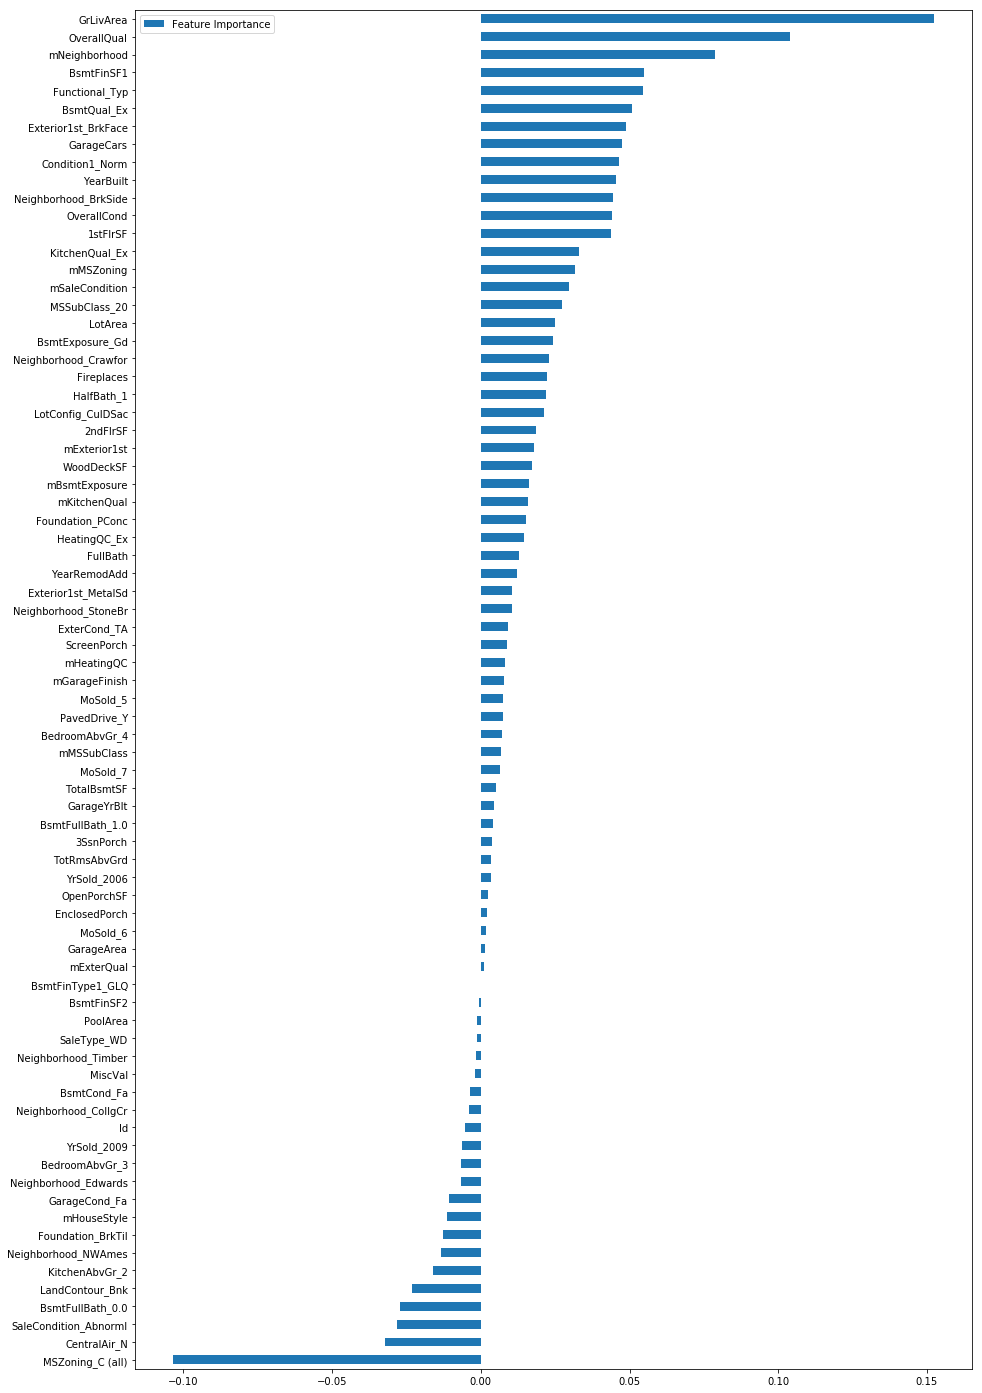

In [66]:
FI_lasso[FI_lasso['Feature Importance']!=0].sort_values("Feature Importance").plot(
kind = 'barh',figsize = (15,25))

In [67]:
FI_lasso[FI_lasso['Feature Importance']>0].index

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'mMSSubClass', 'mMSZoning', 'mNeighborhood',
       'mExterior1st', 'mExterQual', 'mBsmtExposure', 'mHeatingQC',
       'mKitchenQual', 'mGarageFinish', 'mSaleCondition', 'MSSubClass_20',
       'LotConfig_CulDSac', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Exterior1st_BrkFace',
       'Exterior1st_MetalSd', 'ExterCond_TA', 'Foundation_PConc',
       'BsmtQual_Ex', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'BsmtFullBath_1.0', 'HalfBath_1', 'BedroomAbvGr_4', 'KitchenQual_Ex',
       'Functional_Typ', 'PavedDrive_Y', 'MoSold_5', 'MoSold_6', 'MoSold_7',
       'YrSold_2006'],
      dtype='

In [68]:
index = FI_lasso[FI_lasso['Feature Importance']>0].index

# Model Testing 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [72]:
X = pd.DataFrame(X_scaled,columns = data_pipe.columns)[FI_lasso[FI_lasso['Feature Importance']>0].index]


In [73]:
y = y_log

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression 

In [75]:
lm = LinearRegression()

In [76]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
predictions = lm.predict(X_test)

In [78]:
np.exp(predictions)

array([149051.16570007, 315473.01276467,  98423.87451214, 156765.86977638,
       330888.41934993,  76558.64384482, 254102.56541911, 142077.21642672,
        72372.60790122, 139525.11889082, 134449.43045608, 121042.02030608,
        84232.72209431, 205535.34081194, 172447.25199463, 134561.70911661,
       194475.71117955, 130325.42836304, 110463.58365751, 216580.33265336,
       152005.29195461, 205156.93050116, 183161.12313691, 140930.59678877,
       200369.99586226, 153080.98335713, 195552.99982836, 117701.50366404,
       174729.76085318, 197535.86421884, 135456.35561461, 260250.20332061,
       190903.32491927, 115813.43954486, 253135.56039892, 144115.01929567,
       129200.32209151, 211655.54900305, 313395.60960702, 103138.932459  ,
       129555.72881457, 231834.18062618, 114140.30913693, 310379.59778174,
       121914.10541591, 120007.81422458, 104614.33443658, 127421.03905784,
       412927.2422512 , 120871.46789355, 122683.01413523, 208112.93074147,
       112666.38864395, 2

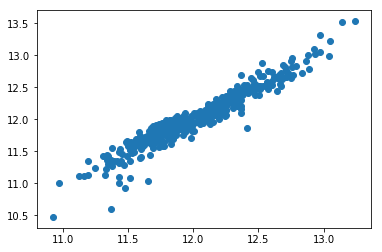

In [79]:
plt.scatter(predictions,y_test)

In [80]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08223042237226405
MSE:   0.014042743490944903
RMSE:   0.11850208222197997


## Lasso Linear Regression

In [81]:
lasso_cv = LassoCV(alphas = [0.0001,0.0001,0.001,0.01,0.1,1,10] )

In [82]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
    cv='warn', eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [83]:
lasso_cv.alpha_

0.001

In [84]:
lasso = Lasso(alpha = 0.001)

In [85]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [86]:
predictions = lasso.predict(X_test)

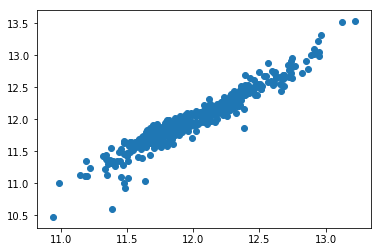

In [87]:
plt.scatter(predictions,y_test)

In [88]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08165221825539944
MSE:   0.014045373500745273
RMSE:   0.11851317859523165


##  Ridge Linear Regression

In [89]:
ridge_cv = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [90]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [91]:
ridge_cv.alpha_

10.0

In [92]:
ridge = Ridge(alpha = 10)

In [93]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
predictions = ridge.predict(X_test)

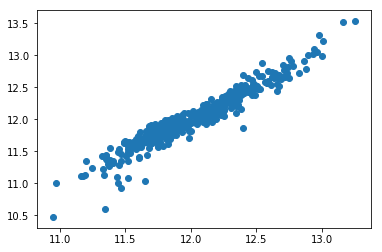

In [95]:
plt.scatter(predictions,y_test)

In [96]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08090267572301105
MSE:   0.013661376344137641
RMSE:   0.1168818905739364


## ElasticNet Linear Regression 

In [97]:
ENet_cv = ElasticNetCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])

In [98]:
ENet_cv.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [99]:
ENet_cv.alpha_

0.001

In [100]:
ENet = ElasticNet(alpha = 0.001)

In [101]:
ENet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [102]:
predictions = ENet.predict(X_test)

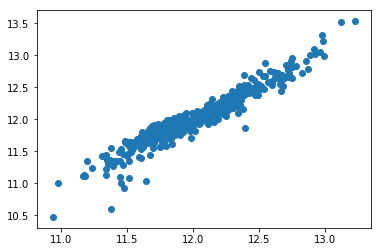

In [103]:
plt.scatter(predictions,y_test)

In [104]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08144092227873702
MSE:   0.013927686968081604
RMSE:   0.11801562171204964


# Test data 

In [105]:
X_train = X
y_train = y_log

In [110]:
X_test = pd.DataFrame(test_X_scaled,columns = data_pipe.columns)[FI_lasso[FI_lasso['Feature Importance']>0].index]



In [111]:
X_test.shape

(1459, 55)

In [112]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [114]:
predictions = ridge.predict(X_test)

In [115]:
Submissions = np.exp(predictions)

In [124]:
Submission3 = pd.concat((pd.DataFrame({'Id':test['Id']})
        ,pd.DataFrame({'SalePrice':Submissions})),axis= 1)

In [125]:
Submission3.to_csv('Submission3.csv',index = False)

In [126]:
Submission3

,Id,SalePrice
0,1461,114123.695403
1,1462,154605.472422
2,1463,179131.247404
3,1464,202406.922373
4,1465,199396.563625
5,1466,166496.925694
6,1467,180991.685224
7,1468,162710.946461
8,1469,202340.747866
9,1470,115426.709745
